# 이미지 바운딩 박스 편집

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

# 이미지 편집

In [2]:
from predict import *


import torch.optim as optim
import torch.nn as nn

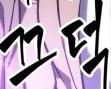

In [3]:
img = Image.open("/home/jun/myWorks/soma/font/dataset/realTesting/끄덕_288.jpg")
img_np = np.array(img)
img

In [4]:

gray = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)
norm_gray = (((gray - gray.min())/(gray.max() - gray.min()))*255).astype(np.uint8)

# threshold
thresh = cv2.threshold(norm_gray, -1, 255, cv2.THRESH_TOZERO | cv2.THRESH_OTSU)[1]

# get the (largest) contour
contours = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]

# draw white filled contour on black background
img2 = np.full_like(norm_gray, 255, np.uint8)
_ = cv2.drawContours(img2, contours, -1, (0,0,0), -1)

if img2[0,0] == 0:
    img2 = 255-img2

In [5]:
tmp = cv2.erode(img2, kernel=np.ones((3, 3), np.uint8), iterations=1)
blur = cv2.dilate(tmp, kernel=np.ones((3, 3), np.uint8), iterations=2)

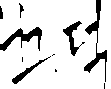

In [6]:
Image.fromarray(blur)

In [7]:
crnn_predict([img_np])

/home/jun/anaconda3/envs/soma-ai_serv/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448265233/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


['선.']

# 인식 안 되는 글자들

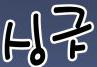

In [7]:
prob1 = Image.open("/home/jun/myWorks/soma/font/dataset/realTesting/싱긋_23.jpg")
prob1

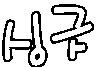

In [11]:
prob_proc = process_img(np.array(prob1))
Image.fromarray(prob_proc)

In [16]:
crnn_predict(prob_proc)

TypeError: src is not a numpy array, neither a scalar

In [2]:
import pickle

In [3]:
with open("/home/jun/myWorks/soma/ai/data/lists/merge_result.pickle", 'rb') as f:
    data = pickle.load(f)

In [4]:
data

[{'id': 1,
  'x': 161.9921875,
  'y': 251.7109375,
  'width': 94.703125,
  'height': 34.890625,
  'text': '대다해'},
 {'id': 2,
  'x': 241.29037475585938,
  'y': 358.37933349609375,
  'width': 242.55636596679688,
  'height': 132.58160400390625,
  'text': '배형자식체뿐. 밖’낸 놈놀낸 놨는'},
 {'id': 3,
  'x': 443.609375,
  'y': 635.5078125,
  'width': 191.8984375,
  'height': 129.59375,
  'text': '서브 시나리오 끝냈으니 보상줘'},
 {'id': 4,
  'x': 426.1640625,
  'y': 1176.3125,
  'width': 196.8828125,
  'height': 77.2578125,
  'text': '그래지 [다e!'}]

In [6]:
img = Image.open("/home/jun/myWorks/soma/ai/data/cropped/test_2.png")
img_np = np.array(img)

In [19]:
ret = []
for bbox in data:
    left = int(bbox["x"])
    right = int(bbox["x"] + bbox["width"])
    top = int(bbox["y"])
    bottom = int(bbox["y"] + bbox["height"])
    bbox_img:np.ndarray = img_np[top:bottom, left:right, :]
    # bbox["fontSize"] = get_fontSize(bbox["width"],bbox["height"])
    # bbox["fontColor"] = str(get_fontColor(bbox_img))
    ret.append(bbox_img)

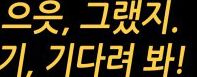

In [198]:
Image.fromarray(ret[3])

In [214]:
gray = cv2.cvtColor(ret[0], cv2.COLOR_BGR2GRAY)
norm_gray = (((gray - gray.min())/(gray.max() - gray.min()))*255).astype(np.uint8)

# threshold
thresh = cv2.threshold(norm_gray, -1, 255, cv2.THRESH_TOZERO | cv2.THRESH_OTSU)[1]

# get the (largest) contour
contours = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]

# draw white filled contour on black background
img2 = np.full_like(norm_gray, 255, np.uint8)
_ = cv2.drawContours(img2, contours, -1, (0,0,0), -1)

if img2[0,0] == 0:
    img2 = 255-img2

In [215]:
tmp = img2.min(axis=1)
tmp[1:] = tmp[1:] - tmp[:-1]

In [216]:
size = np.where((tmp == 255))[0]
size[size>=10]

array([], dtype=int64)

In [195]:
tmp

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,
         0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=uint8)

In [196]:
tmp.shape[0]

77

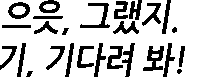

In [197]:
Image.fromarray(img2)

In [71]:
contours

[array([[[202, 123]],
 
        [[201, 124]],
 
        [[201, 125]],
 
        [[200, 126]],
 
        [[202, 128]],
 
        [[203, 127]],
 
        [[204, 127]],
 
        [[204, 126]],
 
        [[205, 125]],
 
        [[205, 124]],
 
        [[204, 123]]], dtype=int32),
 array([[[ 75, 118]],
 
        [[ 75, 122]],
 
        [[ 74, 123]],
 
        [[ 74, 128]],
 
        [[ 94, 128]],
 
        [[ 94, 126]],
 
        [[ 78, 126]],
 
        [[ 77, 125]],
 
        [[ 77, 123]],
 
        [[ 78, 122]],
 
        [[ 78, 118]]], dtype=int32),
 array([[[ 52, 116]],
 
        [[ 51, 117]],
 
        [[ 50, 117]],
 
        [[ 50, 118]],
 
        [[ 49, 119]],
 
        [[ 49, 120]],
 
        [[ 48, 121]],
 
        [[ 48, 122]],
 
        [[ 43, 127]],
 
        [[ 43, 129]],
 
        [[ 45, 129]],
 
        [[ 50, 124]],
 
        [[ 51, 125]],
 
        [[ 51, 126]],
 
        [[ 54, 129]],
 
        [[ 56, 129]],
 
        [[ 61, 124]],
 
        [[ 63, 126]],
 
        [[ 63,